In [33]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df1=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df=pd.read_csv('Unemployment in India.csv')

In [5]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [12]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [16]:
df.Region.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Region                     740 non-null    object        
 1   Date                       740 non-null    datetime64[ns]
 2   Frequency                  740 non-null    object        
 3   Unemployment_Rate          740 non-null    float64       
 4   Employed                   740 non-null    float64       
 5   Labour_Participation_Rate  740 non-null    float64       
 6   Area                       740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [15]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [30]:
df.columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed','Estimated Labour Participation Rate', 'Area']

In [31]:
df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [40]:

df['Date'] = pd.to_datetime(df['Date'])

df.rename(columns={
    'Estimated Unemployment Rate': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate': 'Labour_Participation_Rate'
}, inplace=True)

C:\Users\Abhishek Jha\AppData\Local\Temp\ipykernel_13608\3961355144.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


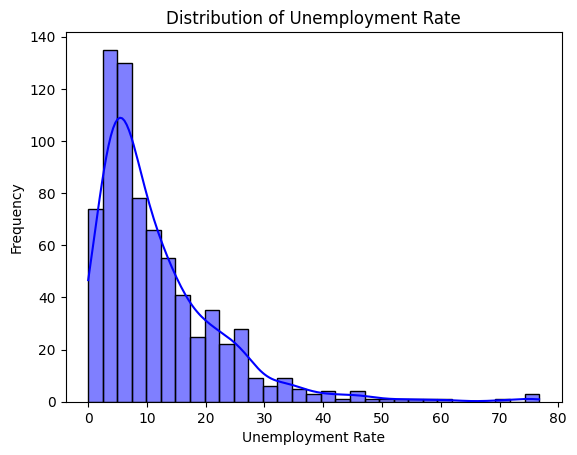

In [43]:
sns.histplot(df['Unemployment_Rate'], kde=True, color='blue')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

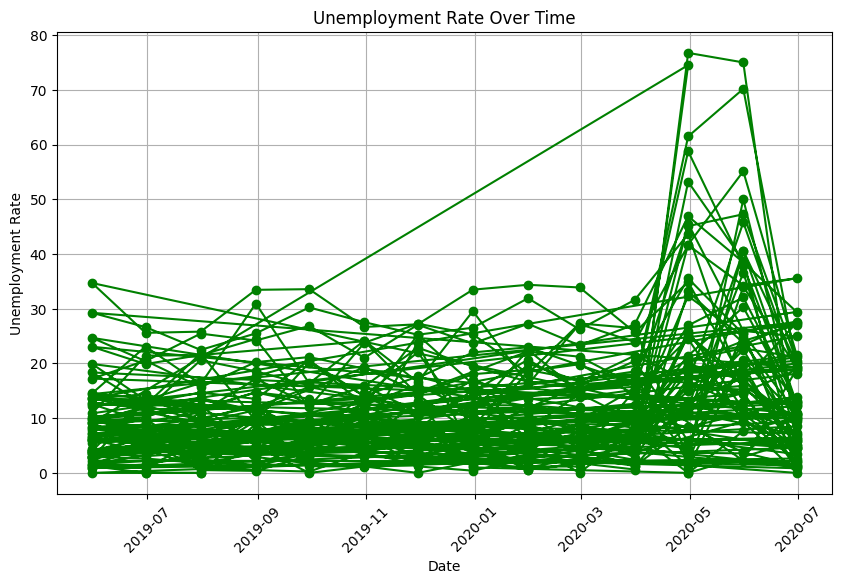

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Unemployment_Rate'], marker='o', color='green')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

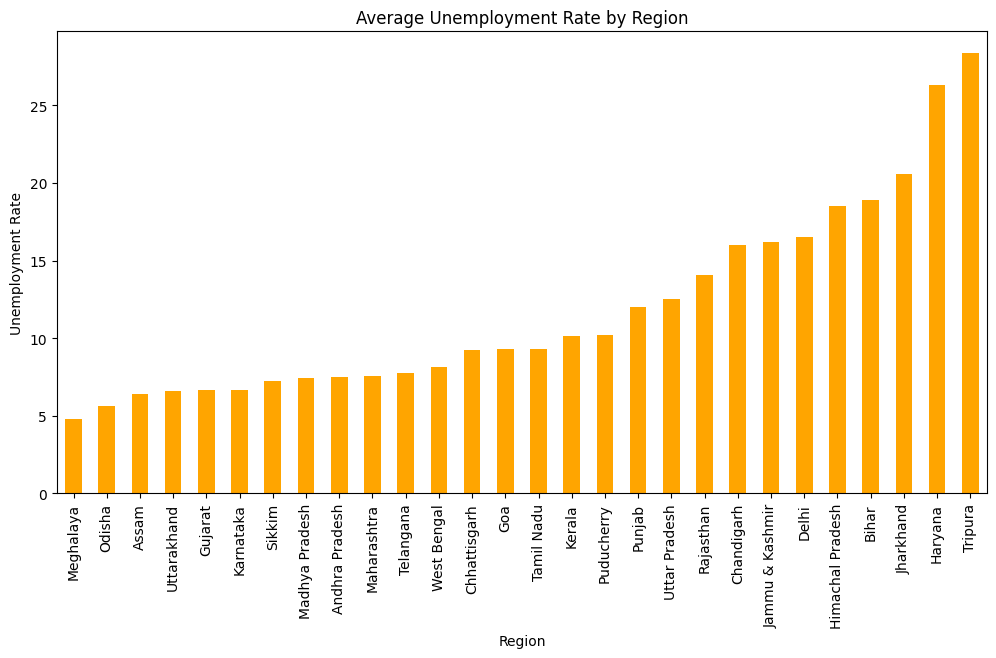

In [45]:
region_avg = df.groupby('Region')['Unemployment_Rate'].mean().sort_values()

plt.figure(figsize=(12, 6))
region_avg.plot(kind='bar', color='orange')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.show()

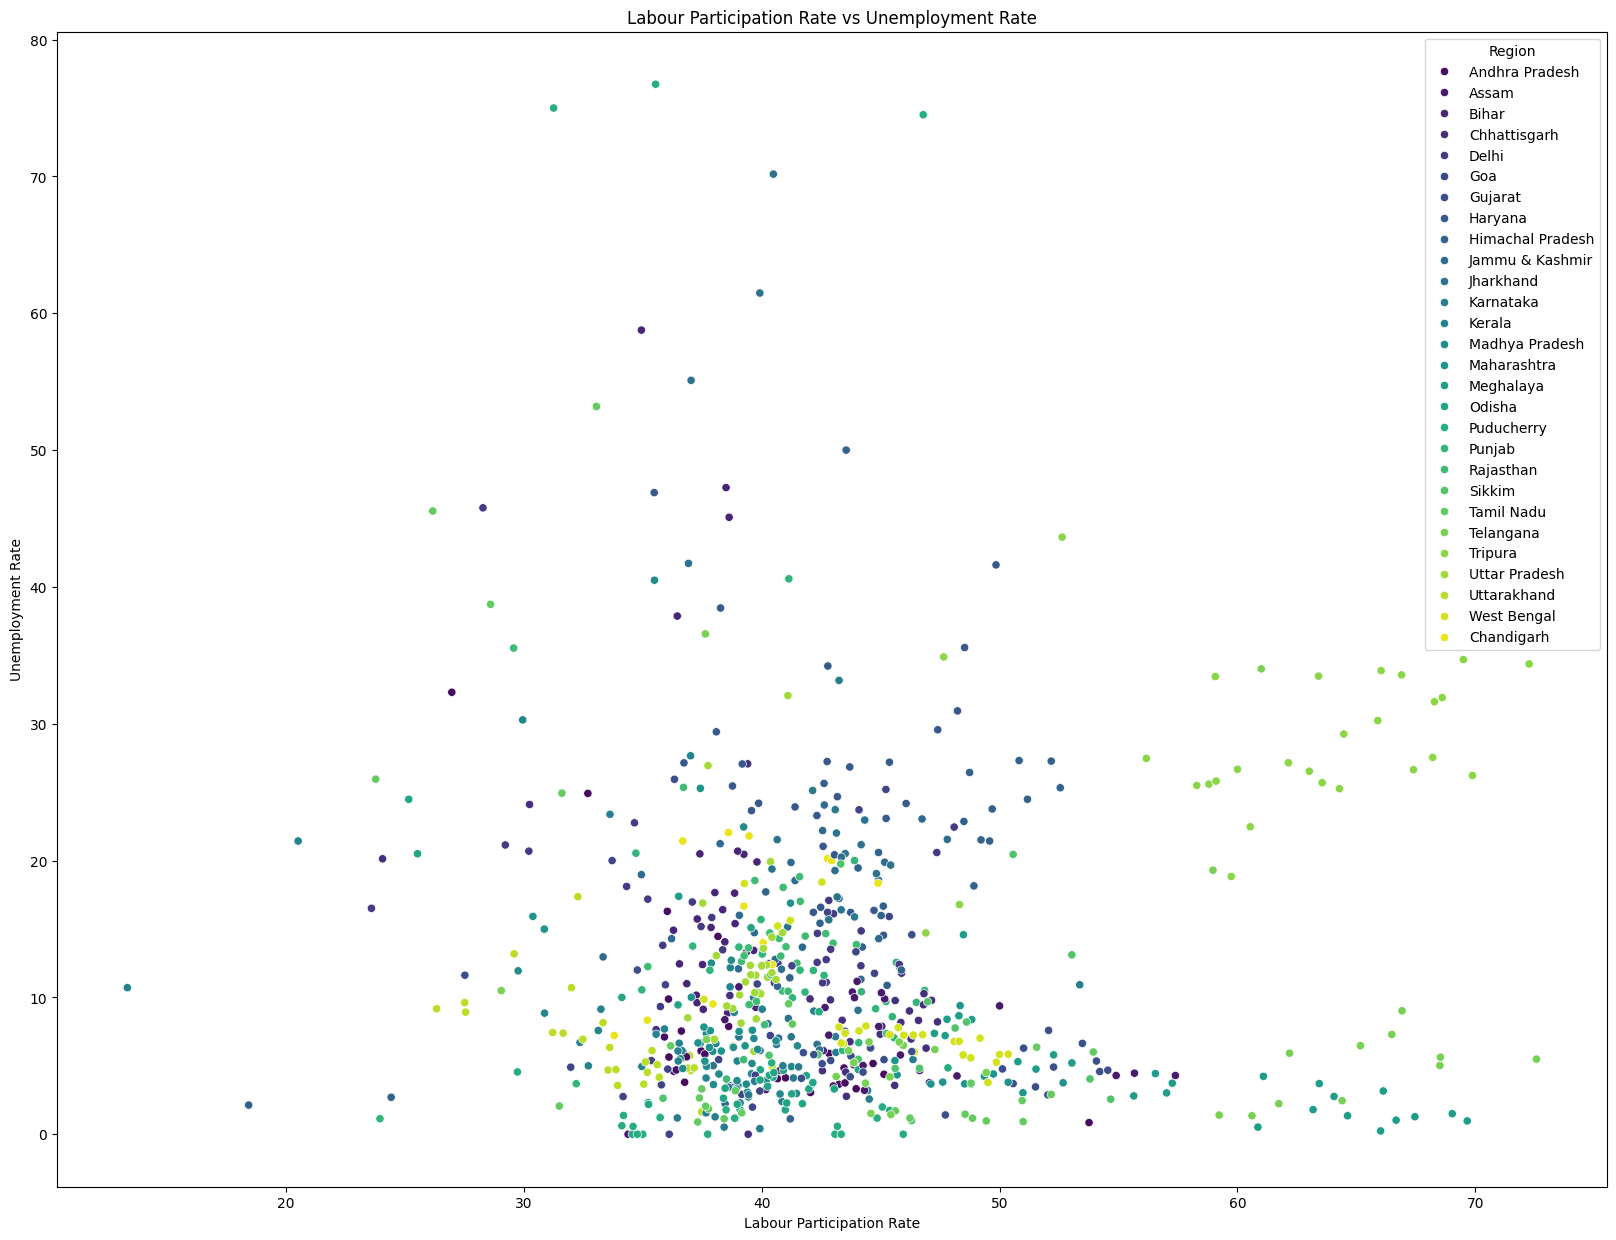

In [50]:
plt.figure(figsize=(20, 15))
sns.scatterplot(data=df, x='Labour_Participation_Rate', y='Unemployment_Rate', hue='Region', palette='viridis')
plt.title('Labour Participation Rate vs Unemployment Rate')
plt.xlabel('Labour Participation Rate')
plt.ylabel('Unemployment Rate')
plt.show()

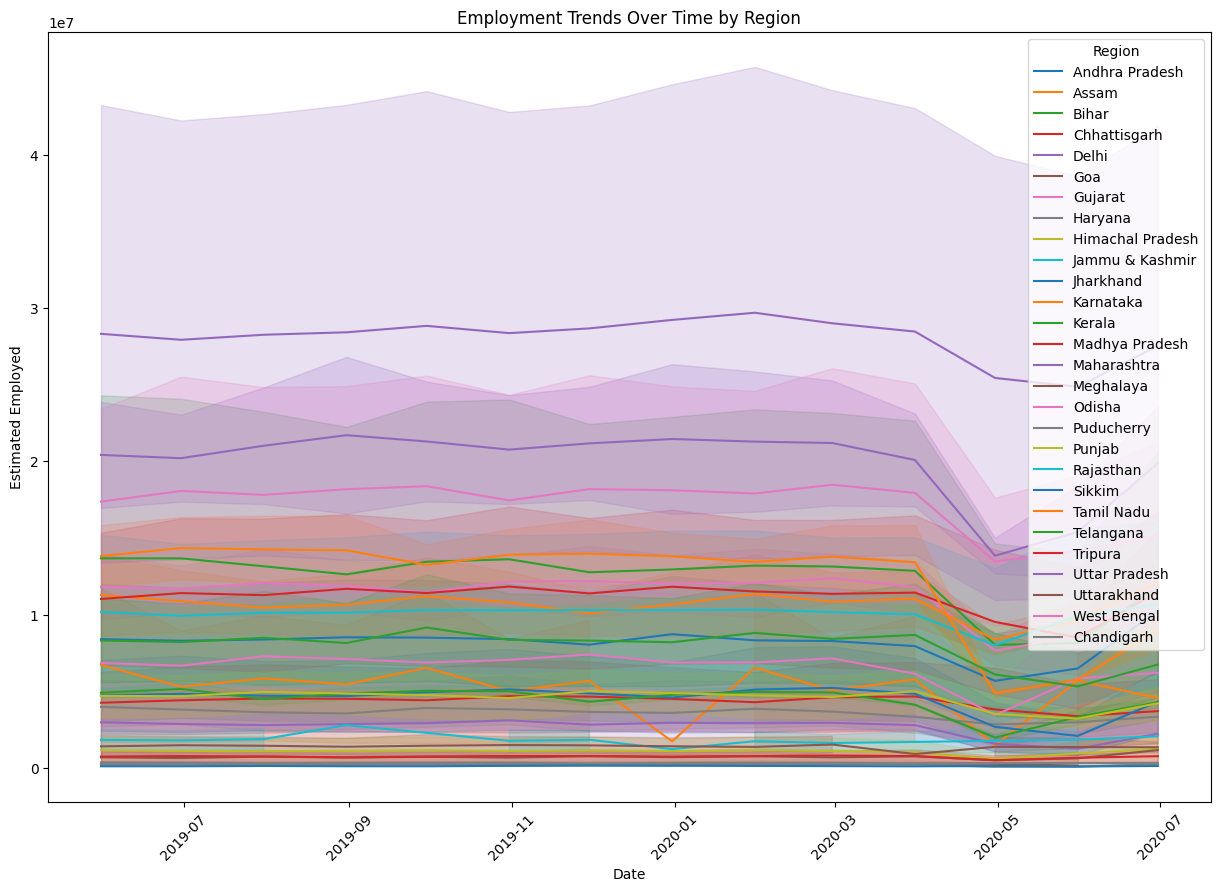

In [56]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df, x='Date', y='Employed', hue='Region', palette='tab10')
plt.title('Employment Trends Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Employed')
plt.legend(title='Region', loc='upper right')
plt.xticks(rotation=45)
plt.show()

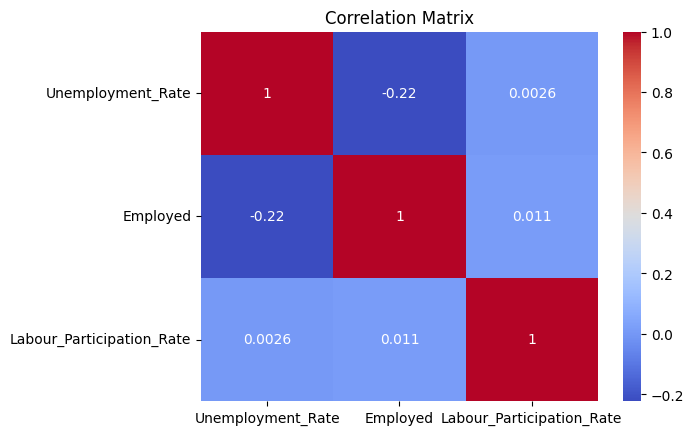

In [51]:
correlation_matrix = df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()